# Seating Six Feet Apart

### Introduction
As campuses reopen for the fall semester, implementing social distancing measures is a top priority. Students need to maintain a 6 foot distance in lecture halls which means the seating capacity will drop. This is an issue for large and small classes when it comes to room assignments. For ENGRI 1101, we want to enable as many students as possible to attend in-person labs so that they can get immediate help or use the lab computers.  

In [1]:
# imports -- make sure you run this cell
import pandas as pd
import numpy as np
import math, itertools
import matplotlib.pyplot as plt
import networkx as nx
from ortools.linear_solver import pywraplp as OR
import shapely
from shapely.geometry import Polygon, Point

In [2]:
# seat-packing model
def MIS(nodes, edges):
    NODES = nodes    # the set of nodes
    EGDES = edges    # the set of edges
    
    # define model
    m = OR.Solver('maxIndSet', OR.Solver.CBC_MIXED_INTEGER_PROGRAMMING)
    
    # decision variables
    x = {} 
    for i in nodes:
        x[i] = m.IntVar(0, 1, ('%s' % (i)))
    
    # objective function
    m.Maximize(sum(x[i] for i in nodes))
        
    # constraints
    for edge in edges:
        m.Add(x[edge[0]] + x[edge[1]] <= 1)

    m.Solve()
    
    # display solution
    sol = {}
    for i in nodes:
        sol.update( {x[i].name() : x[i].solution_value()} )
    print('Total seats:', m.Objective().Value())
    
    return sol

## Challenge

It was mentioned in the introduction that ENGRI 1101 wanted to maximize lab classroom seating. Unlike in lecture halls, the chairs have wheels and can be moved. How will you approach this problem?

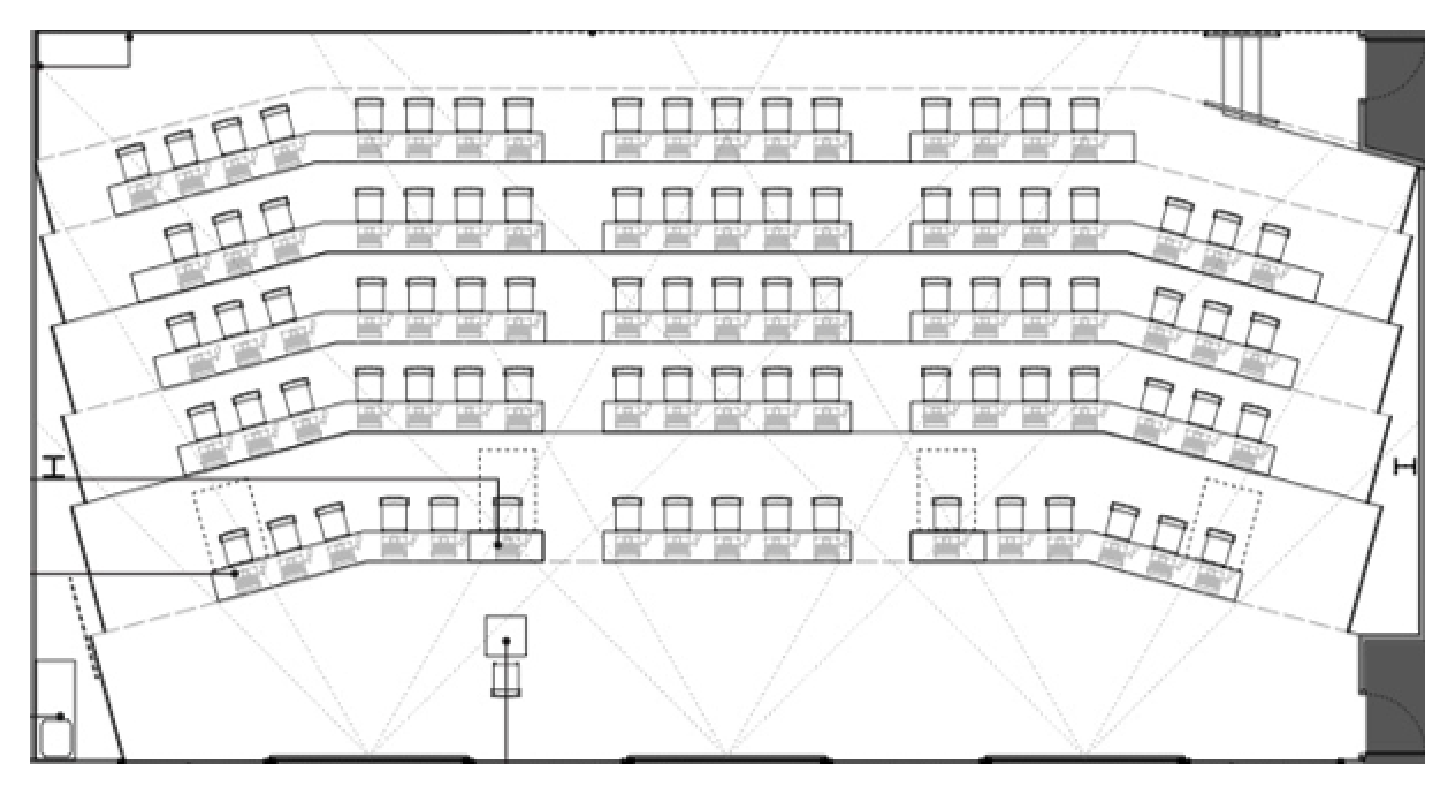

In [3]:
# show Rhodes 571
room = plt.imread('labclassroom.png')
plt.subplots(dpi=300)
plt.axis('off')
plt.imshow(room);

Imagine that all the chairs in Rhodes 571 are taken outside the room and brought back one at a time. The tables are fixed in place. (Ignore the laptops since they are movable.) Where can you place each chair that is brought back?

**Q1:** Will there be fewer or more nodes than chairs currently in the image?  
**A:** 

**Q2:** Describe where there might be nodes. Are they close or far apart?  
**A:**

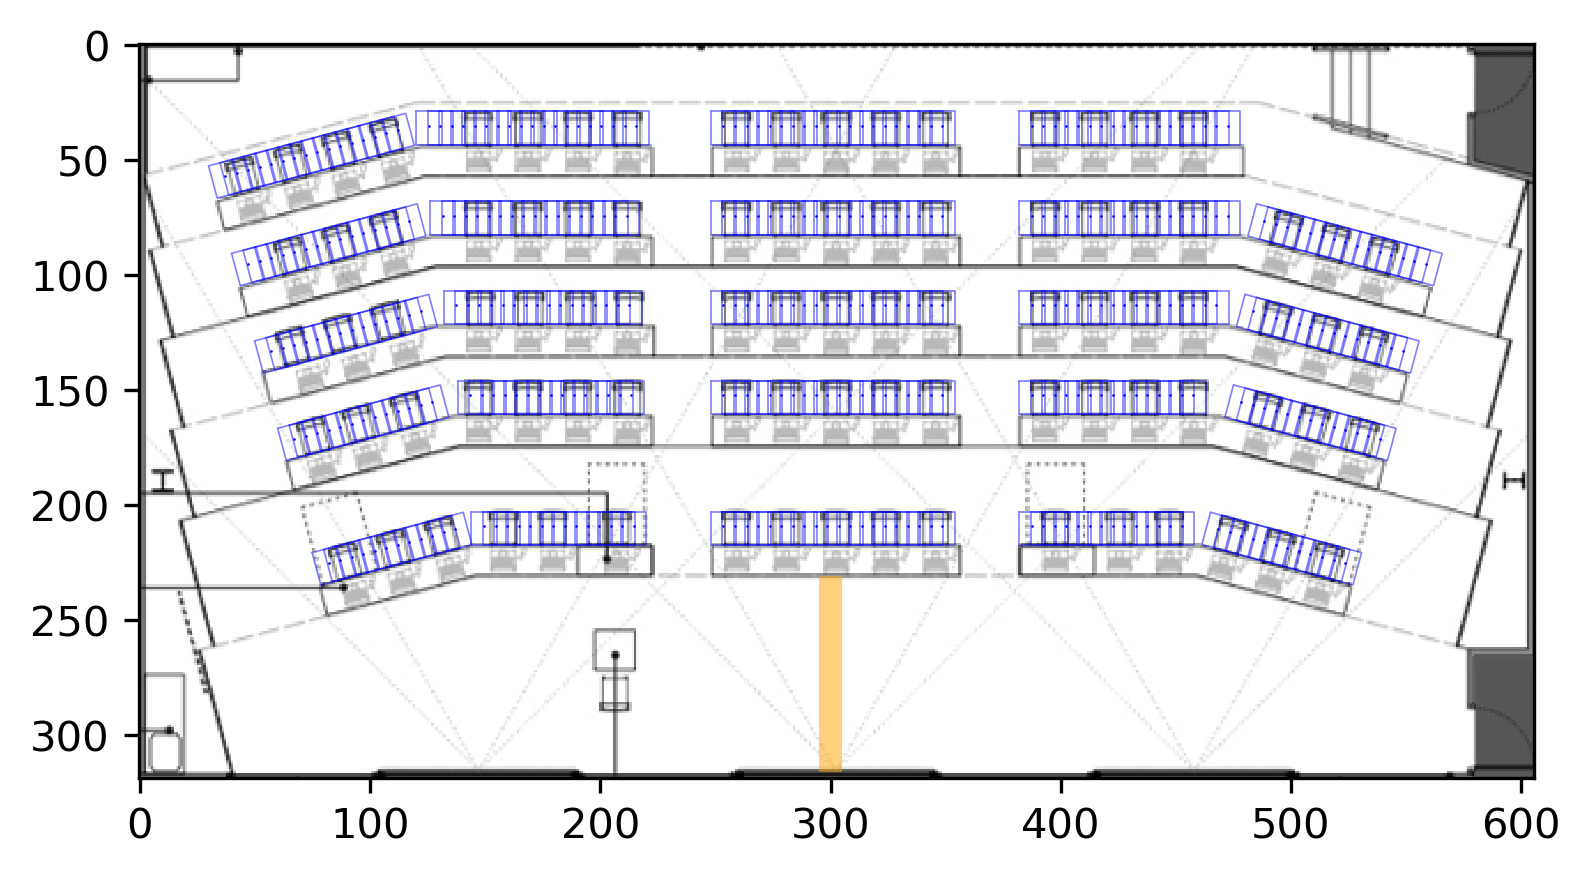

In [4]:
# add drawings
from seat_packing_lab import ex_lab
polys2, points2 = ex_lab()

Is this what you pictured? Each rectangle represents a possible chair placement. The distance between these possible chair placements is arbitrary. In reality, there are an infinite number of chair placements but then the problem would be too big. The arbitrary distance used was a good balance between accuracy and the problem size. Run the next cell to see how many nodes and edges we have here.

In [5]:
# (code by Sander Aarts)

# define a dataframe of Polygons and Points
df2 = pd.DataFrame(list(zip(polys2, points2)), 
               columns =['polygon', 'point'])

# generate edges from distances
edgelist2 = list()      # overall list of (directed) edges

for i in range(df2.shape[0]):
    for j in range(df2.shape[0]):
        if (i != j):
            dist = df2['polygon'][j].distance(df2['point'][i])
            if (dist <= 51):    # 51 pixels = 6 feet
                edgelist2.append((i,j)) # add edge if seat is too close

print('There are %d nodes and %d edges.' % (df2.shape[0], len(edgelist2)))

There are 387 nodes and 13793 edges.


Even at this scale, our solvers can solve no problem! (Solving this integer program takes around 30 seconds)

In [6]:
# solve for room
sol2 = MIS(df2.index.values, edgelist2)

Total seats: 27.0


22 is the capacity if chairs are not moved. 27 is a <font color='orange'>22.7%</font> increase!

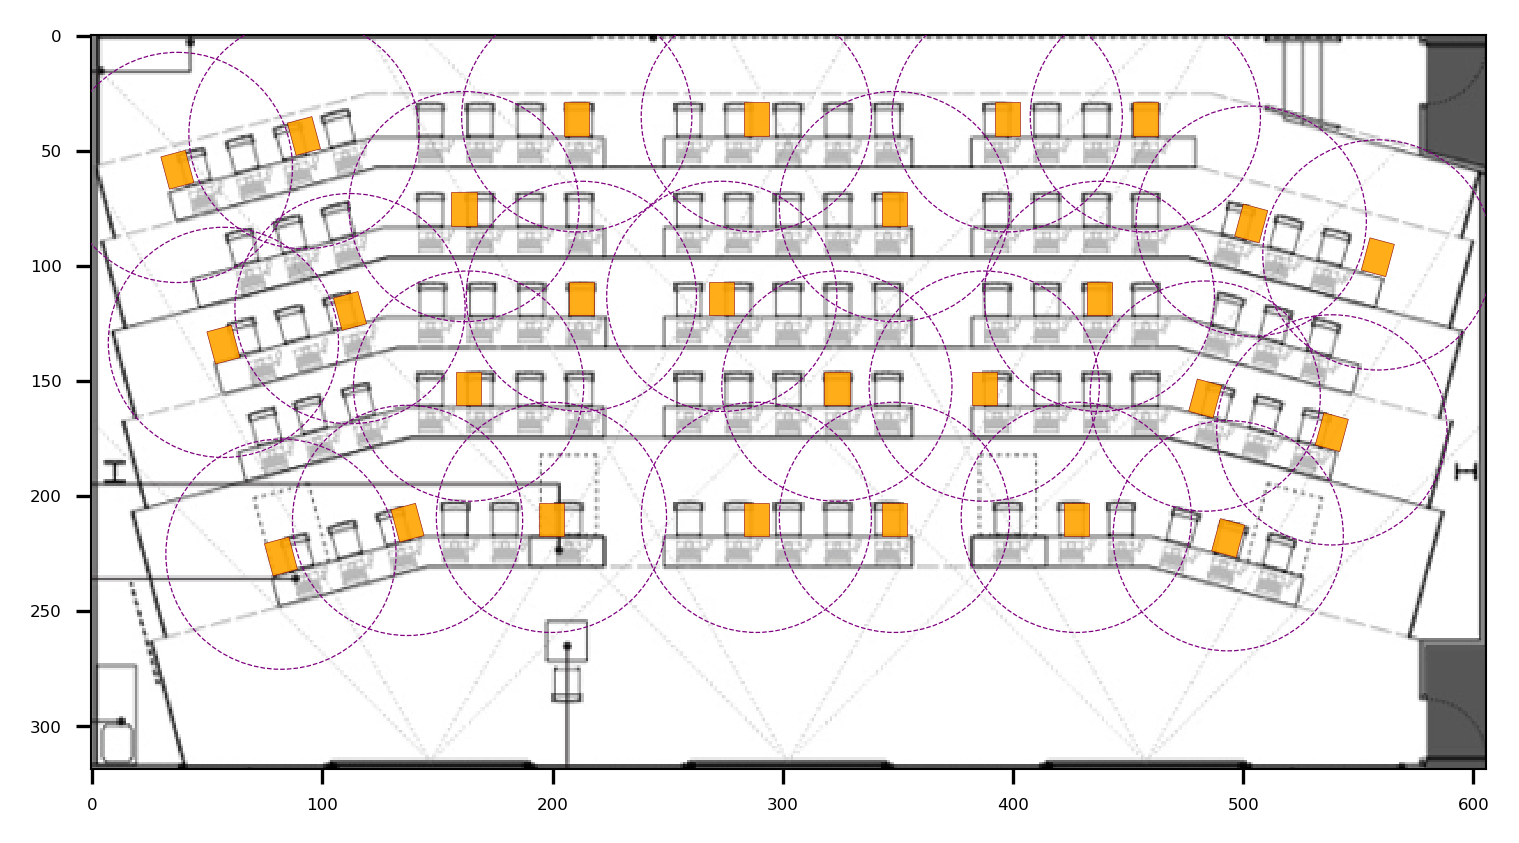

In [7]:
# show solution on room
from seat_packing_lab import ex_lab_sol
ex_lab_sol(df2, sol2)

Congratulations! You just got a taste of the actual process used to determine seating configurations subject to 6-feet social distancing requirements for Cornell (and it was done by previous ENGRI 1101 students too!).